In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r"final_cleaned_student_data.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_category,prep_effectiveness
0,female,Group B,Bachelor'S Degree,standard,none,72,72,74,72.666667,Medium,NaN
1,female,Group C,Some College,standard,completed,69,90,88,82.333333,High,Completed
2,female,Group B,Master'S Degree,standard,none,90,95,93,92.666667,High,NaN
3,male,Group A,Associate'S Degree,free/reduced,none,47,57,44,49.333333,Low,NaN
4,male,Group C,Some College,standard,none,76,78,75,76.333333,Medium,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,female,Group E,Master'S Degree,standard,completed,88,99,95,94.000000,High,Completed
996,male,Group C,High School,free/reduced,none,62,55,55,57.333333,Low,NaN
997,female,Group C,High School,free/reduced,completed,59,71,65,65.000000,Medium,Completed
998,female,Group D,Some College,standard,completed,68,78,77,74.333333,Medium,Completed


# Exploratory Data Analysis & Descriptive Statistics
## Exploratory Data Analysis:

### Histograms for all three subject scores.

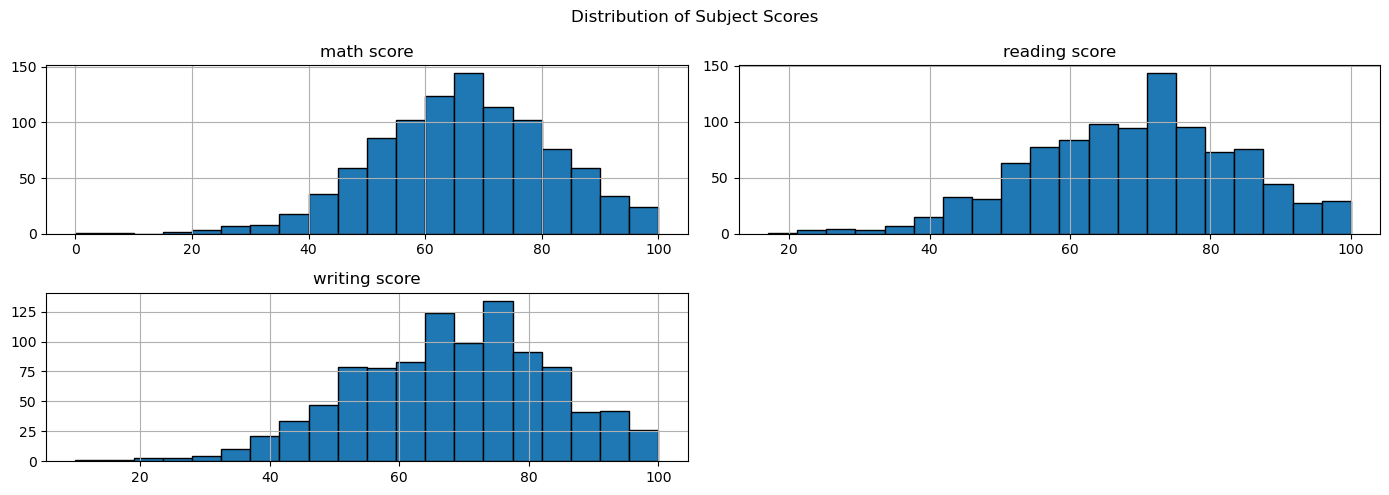

In [4]:
# Histograms are used to visualize the distribution of continuous data (like scores).
# They help us understand:
# Whether scores are normally distributed
# Any skewness (left or right)
# Where most students are scoring (e.g., 60–80 range)
# Code reflects: Frequency of scores in bins (intervals)

# Plot histograms to analyze the distribution of scores in each subject
df[["math score", "reading score", "writing score"]].hist(
    bins=20,              # number of score intervals (0–100 split in 20 parts)
    figsize=(14, 5),      # wide layout for 3 plots side by side
    edgecolor='black'     # add border to histogram bars
)

plt.suptitle("Distribution of Subject Scores")  # main title for all three
plt.tight_layout()  # fix overlap between subplots and axis labels
plt.show()


### Box plots comparing scores by gender and parental education level

### By Gender

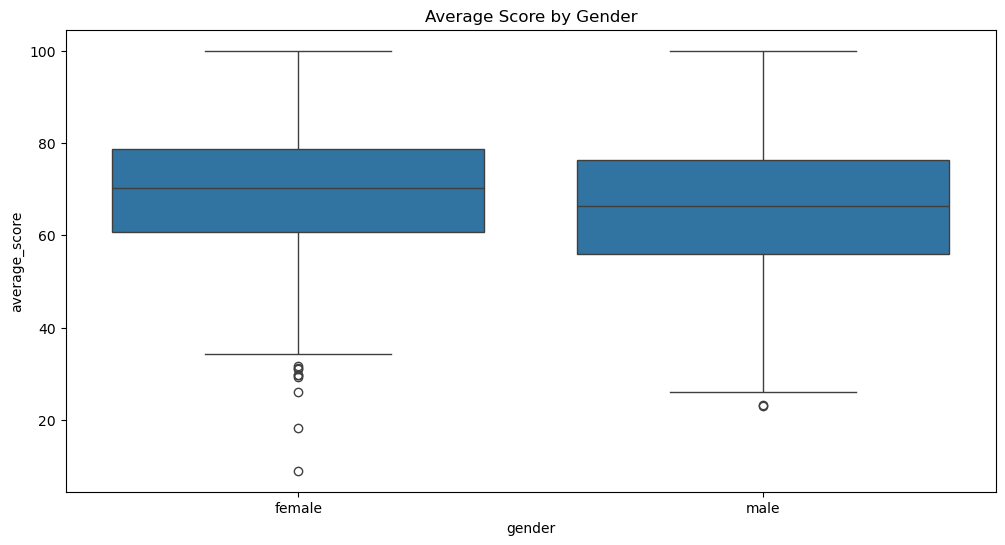

In [5]:
# Create a wide figure for clear boxplot visualization
plt.figure(figsize=(12, 6))

# Boxplot shows median, spread, and outliers of average scores grouped by gender
# x = categorical (gender), y = numerical (average score)
sns.boxplot(x="gender", y="average_score", data=df)

# Title for the plot
plt.title("Average Score by Gender")

# Display the plot
plt.show()


### By Parental Education

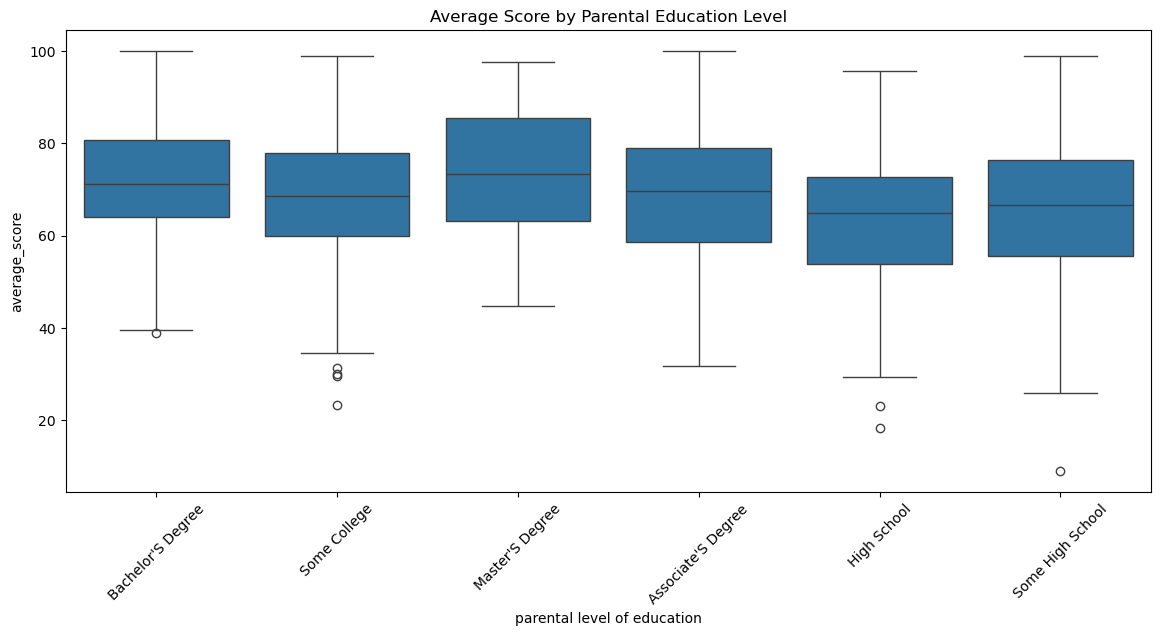

In [6]:
# Create a wide figure to clearly show all education level categories
plt.figure(figsize=(14, 6))

# Boxplot to compare distribution of average scores by parental education
# Each box shows median, spread, and outliers per category
sns.boxplot(x="parental level of education", y="average_score", data=df)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add title
plt.title("Average Score by Parental Education Level")

# Show the plot
plt.show()


### Grouped bar plots of average scores across test preparation and lunch type.

### Test Prep

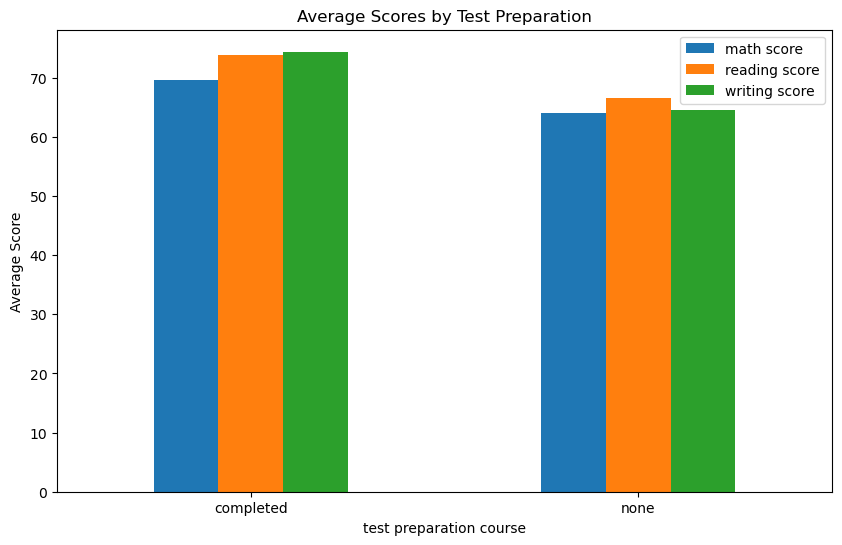

In [7]:
# Group students by test preparation status and calculate mean scores in math, reading, and writing
prep = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean().reset_index()

# Create a bar chart comparing average scores for each subject
prep.plot(x="test preparation course", kind="bar", figsize=(10,6))

# Set title and axis labels
plt.title("Average Scores by Test Preparation")
plt.ylabel("Average Score")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()


### Lunch Type

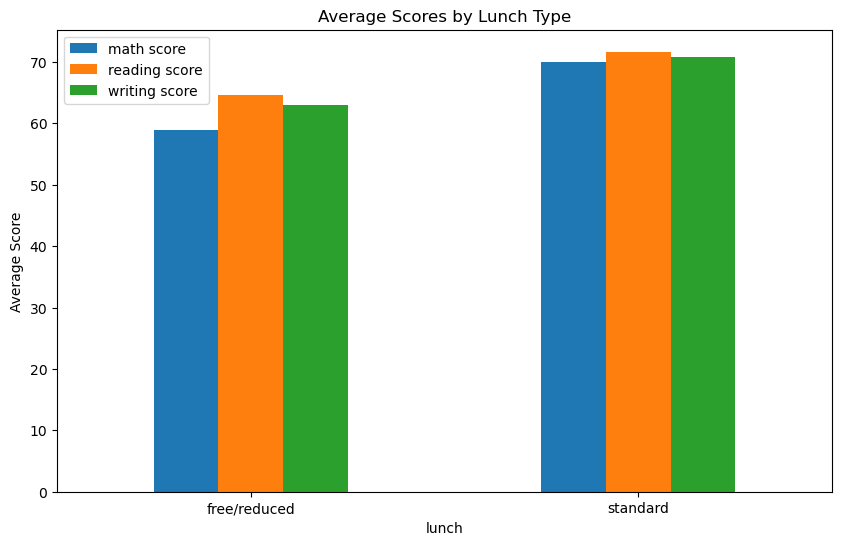

In [8]:
# It shows the average scores in math, reading, and writing for each lunch group — useful for comparing academic performance by nutrition/access level.

# Group students by lunch type and calculate mean scores in math, reading, and writing
lunch = df.groupby("lunch")[["math score", "reading score", "writing score"]].mean().reset_index()
# Plot average scores for each subject by lunch type
lunch.plot(x="lunch", kind="bar", figsize=(10,6))
# Add title and labels
plt.title("Average Scores by Lunch Type")  # Title of the plot
plt.ylabel("Average Score") # Y-axis label
plt.xticks(rotation=0) # Keep x-axis labels horizontal
# Show the plot
plt.show()


### Heatmap of correlation among numerical features.

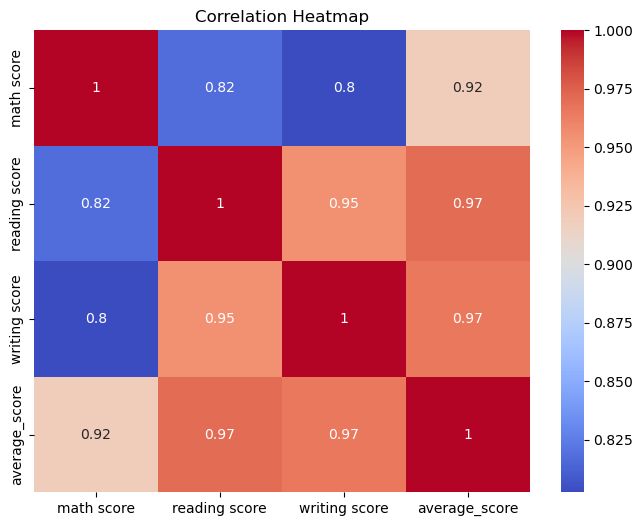

In [9]:
# Generate heatmap to visualize correlations between subject scores and average_score

# Create a figure with appropriate size
plt.figure(figsize=(8, 6))
# Generate correlation matrix between subject scores and average_score
# .corr() computes Pearson correlation; annot=True shows values in the cells
sns.heatmap(df[["math score", "reading score", "writing score", "average_score"]].corr(), annot=True, cmap="coolwarm")
# Add title to the plot
plt.title("Correlation Heatmap")
# Show the plot
plt.show()


### Scatter plot of math vs. reading scores with performance category color-coding.

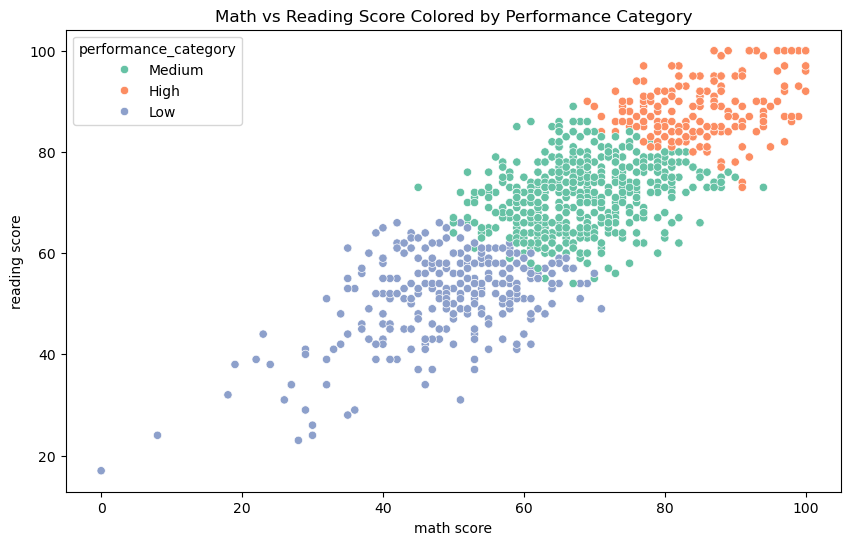

In [10]:
# This scatter plot shows the relationship between math and reading scores. Each point is a student, and their color represents their
# performance category (Low, Medium, High).

# Create a figure with specified size
plt.figure(figsize=(10, 6)) 

# Scatter plot of math vs reading scores, colored by performance level
# hue differentiates performance category; palette controls the color scheme
sns.scatterplot(
    data=df, 
    x="math score", 
    y="reading score", 
    hue="performance_category", 
    palette="Set2"
)

# Add title to plot
plt.title("Math vs Reading Score Colored by Performance Category")

# Show the plot
plt.show()



### Stacked bar chart showing performance category by ethnic group

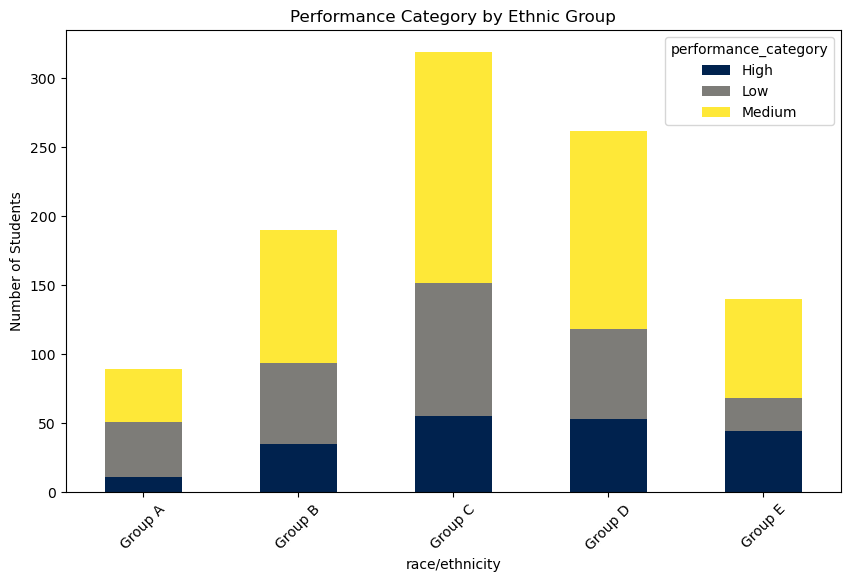

In [11]:
# Create a contingency table: rows = ethnic groups, columns = performance categories
ethnic_perf = pd.crosstab(df["race/ethnicity"], df["performance_category"])

# Plot as a stacked bar chart to show performance distribution by ethnic group
ethnic_perf.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="cividis")

# Add title and labels
plt.title("Performance Category by Ethnic Group")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)  # Rotate labels for better readability

# Show the chart
plt.show()


### Count plot of number of students in each performance tier by gender.

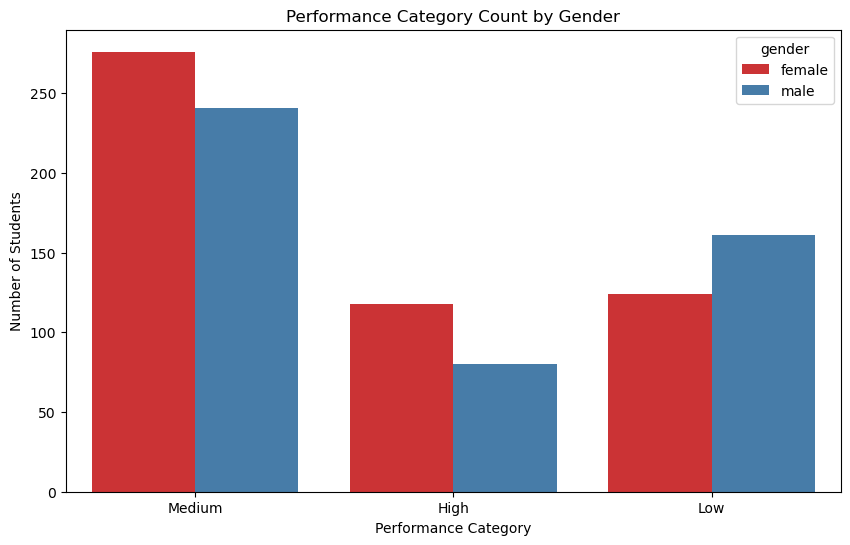

In [12]:
# Create a figure for the count plot
plt.figure(figsize=(10, 6))

# Countplot of students per performance category, split by gender
# hue adds separate bars for male and female within each category
sns.countplot(data=df, x="performance_category", hue="gender", palette="Set1")

# Add title and axis labels
plt.title("Performance Category Count by Gender")
plt.xlabel("Performance Category")
plt.ylabel("Number of Students")

# Show the plot
plt.show()


## Descriptive Statistics

### Calculate mean, median, variance, and standard deviation for all three scores

In [13]:
# Loop over subject columns to calculate and print basic statistics
for subject in ['math score', 'reading score', 'writing score']:
    print(f"\n{subject.upper()}:")  # Print the subject name in uppercase
    print(f"Mean: {df[subject].mean():.2f}")       # Average score
    print(f"Median: {df[subject].median():.2f}")   # Middle value
    print(f"Variance: {df[subject].var():.2f}")    # Spread in squared units
    print(f"Standard Deviation: {df[subject].std():.2f}")  # Spread in original units



MATH SCORE:
Mean: 66.09
Median: 66.00
Variance: 229.92
Standard Deviation: 15.16

READING SCORE:
Mean: 69.17
Median: 70.00
Variance: 213.17
Standard Deviation: 14.60

WRITING SCORE:
Mean: 68.05
Median: 69.00
Variance: 230.91
Standard Deviation: 15.20


### Summary Tables: Average Scores per Lunch Type & Test Prep


### Lunch Type

In [6]:
# It groups the dataset by the lunch category and calculates the mean scores (math, reading, writing, and overall average) for each 
# lunch type (standard, free/reduced).
# Print average subject scores for each lunch type group
print("\nAverage Scores by Lunch Type:")
print(
    df.groupby("lunch")[["math score", "reading score", "writing score", "average_score"]].mean()
)


Average Scores by Lunch Type:
              math score  reading score  writing score  average_score
lunch                                                                
free/reduced   58.921127      64.653521      63.022535      62.199061
standard       70.034109      71.654264      70.823256      70.837209


### Test Prep

In [14]:
# It groups the dataset by the test preparation course status (e.g., "completed" or "none") and calculates the average score in math, reading, writing, 
# and overall for each group.
# Print the average math, reading, writing, and overall scores
# Grouped by whether students completed the test preparation course
print("\nAverage Scores by Test Preparation Course:")
print(
    df.groupby("test preparation course")[["math score", "reading score", "writing score", "average_score"]].mean()
)


Average Scores by Test Preparation Course:
                         math score  reading score  writing score  \
test preparation course                                             
completed                 69.695531      73.893855      74.418994   
none                      64.077882      66.534268      64.504673   

                         average_score  
test preparation course                 
completed                    72.669460  
none                         65.038941  


### Calculate coefficient of variation for math, reading, and writing scores

In [15]:
# Formula: CV = (Standard Deviation / Mean) * 100
# Calculate and print the coefficient of variation for each subject
# CV = (std deviation / mean) * 100 → Shows relative spread as percentage
print("\nCoefficient of Variation (%):")
for subject in ['math score', 'reading score', 'writing score']:
    mean = df[subject].mean()
    std = df[subject].std()
    cv = (std / mean) * 100
    print(f"{subject.title()}: {cv:.2f}%")  # Print with 2 decimal places


Coefficient of Variation (%):
Math Score: 22.94%
Reading Score: 21.11%
Writing Score: 22.33%


### Rank top 3 factors associated with high performance (based on group averages).

In [16]:
# List of categorical factors to evaluate
factors = ['gender', 'lunch', 'test preparation course', 'parental level of education', 'race/ethnicity']
scores = []

for factor in factors:
    # Compute average score per category, then take the mean of those group means
    avg_score = df.groupby(factor)['average_score'].mean().mean()
    scores.append((factor, avg_score))

# Sort factors by average score, descending, and get top 3
top_factors = sorted(scores, key=lambda x: x[1], reverse=True)[:3]

# Print top 3 scoring factors
print("\nTop 3 Factors Associated with High Performance (by group average):")
for factor, score in top_factors:
    print(f"{factor.title()} → Avg Score: {score:.2f}")


Top 3 Factors Associated with High Performance (by group average):
Test Preparation Course → Avg Score: 68.85
Parental Level Of Education → Avg Score: 68.63
Gender → Avg Score: 67.70


### Determine which feature (e.g., lunch type, gender) has the largest score variance.

In [17]:
# It calculates the average variance of average scores within each category of a feature (e.g., male/female in gender).
# Then it finds the feature where the scores vary the most across its groups

# Calculate which feature has the highest variation in student average scores
feature_variances = {}

for feature in ['gender', 'lunch', 'test preparation course', 'parental level of education', 'race/ethnicity']:
    # Calculate average variance across all categories of a feature
    variance = df.groupby(feature)['average_score'].var().mean()
    feature_variances[feature] = variance

# Find the feature with maximum average score variance
max_var_feature = max(feature_variances, key=feature_variances.get)

print(f"\nFeature with largest variance in average score: {max_var_feature.title()} → Variance: {feature_variances[max_var_feature]:.2f}")



Feature with largest variance in average score: Race/Ethnicity → Variance: 201.18
